# 1. Giới thiệu chung AES

- AES - Advanced Encryption Standard - là một thuật toán mã hóa khối.
- AES làm việc với các khối dữ liệu 128bit và độ dài khóa 128bit, 192bit hoặc 256bit. Các khóa mở rộng sử dụng trong chu trình được tạo ra bởi thủ tục sinh khóa Rijndael.
- Mỗi khối dữ liệu đầu vào 128bit được chia thành 16byte, có thể xếp thành 4 cột, mỗi cột 4 phần tử hay một ma trận 4x4 của các byte, nó gọi là ma trận trạng thái.
- Tùy thuộc vào độ dài của khóa khi sử dụng 128bit, 192bit hay 256bit mà thuật toán được thực hiện với số lần lặp khác nhau.

# 2. Đặc điểm
- AES là một thuật toán mã khối (128 bits dữ liệu) là khóa đối xứng.
- AES thực hiện 10, 12 hoặc 14 vòng mã hóa.
- Độ dài khóa có 3 loại là 128, 192, 256 bits tương ứng AES-128, AES-192, AES-256.
- Vòng lặp chính của AES là :

    1. SubBytes() - hàm thay thế các byte dữ liệu.
    
    2. ShiftRows() - dịch vòng dữ liệu.
    
    3. MixColumns() - trộn cột dữ liệu.
    
    4. AddRoundKey() - Chèn Khóa vòng.

### MÔ HÌNH THUẬT TOÁN TỔNG QUÁT AES
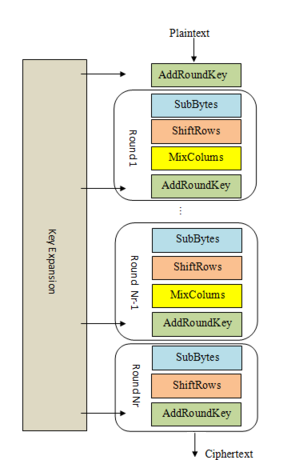


- Bước 1.( bước khởi tạo): dữ liệu cần được mã hóa plain_text kết hợp với key bằng chức năng AddRoundKey.
- Bước 2. Bước lặp mã hóa: kết quả bước 1 được sử dụng để thực hiện tuần tự các chức năng SubBytes, ShiftRows, MixColumns và AddRoundKey. Bước này được lặp lại 9 lần. Chú ý, KeyExpansion thực hiện song song với bước AddRoundKey để tạo khóa vòng cho chức năng này.
- Bước 3. Bước tạo ngõ ra: Sau 9 lần lặp ở bước 2, kết quả được sử dụng để thực hiện tuần tự các chức năng SubBytes, ShiftRows và AddRoundKey để tạo ngõ ra cipher_text.

### Chức năng Expansion Key
- Key Expansion có chức năng từ 128 bit key ban đầu nó sẽ tạo ra các khóa khác cho các vòng lặp tiếp theo.
- Chức năng KeyExpansion được thực hiện thông qua 3 chức năng là RotWord, SubWord, AddRcon.

- Mỗi khóa vòng có 128 bit được chia làm 4 word, mỗi word là 4 byte và ký hiệu là w[j] với j là số nguyên. Mã hóa AES-128 có 1 khóa mã và 10 khóa vòng nên tổng số từ là 44 và được đánh số từ 0 đến 43. Khóa mã có 4 từ là w[0], w[1], w[2] và w[3]. Khóa vòng 1 có 4 từ là w[4], w[5], w[6] và w[7]. Tương tự, khóa vòng 10 có 4 từ là w[40], w[41], w[42] và w[43].

    . Key Expansion có 2 kiểu mã hóa key: Đối với các cột w[j] mà j chia hết cho 4 thì làm theo sơ đồ dưới:
    
    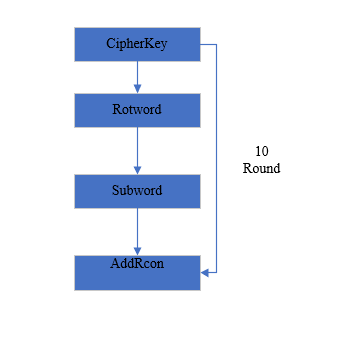
    
    . Còn gì không chi hết cho 4 thì w[j-1] xor w[j-4] (j >= 4 vì từ 0->3 là key khóa rồi)
Ví dụ: W[5] = w[4] xor w[1]


# 1.RotWord
- Chức năng RotWord thực hiện quay trái từ w[j] một byte

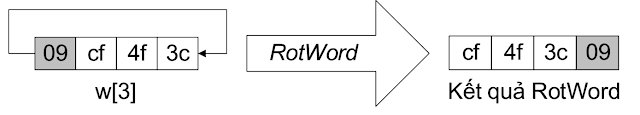

#### 2.Subword
- Tương tự với SubByte() là thay thế các word trong cột theo s - box
S-box:
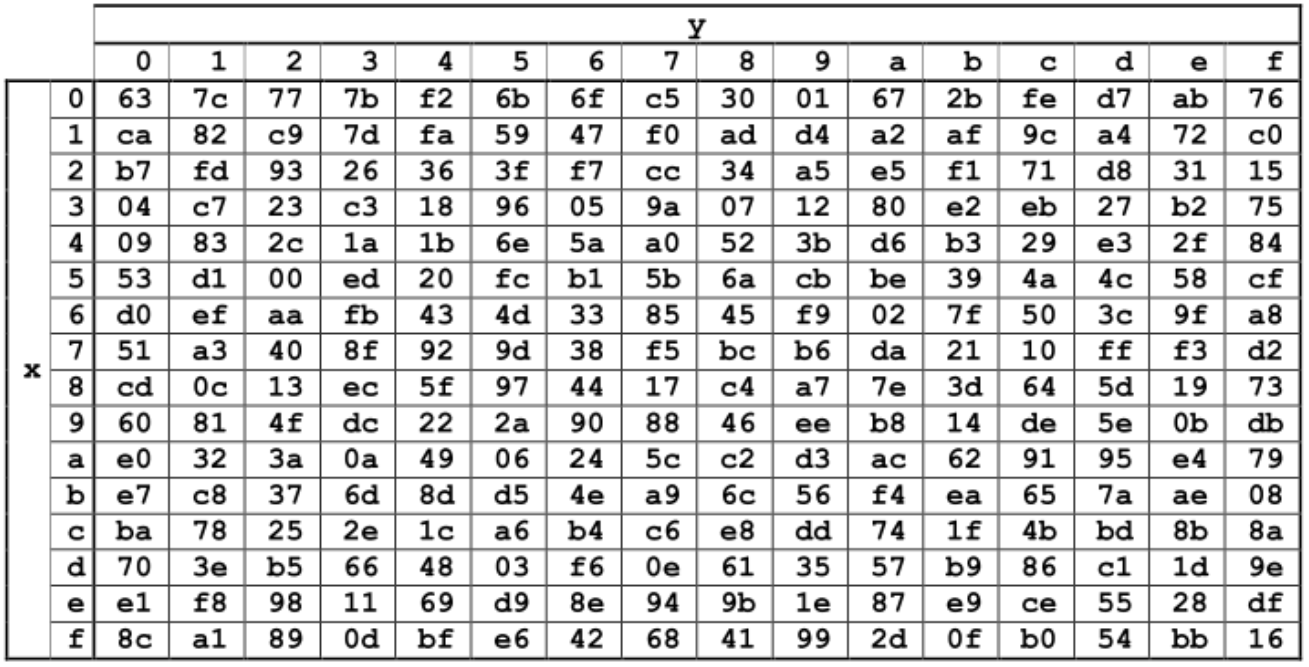

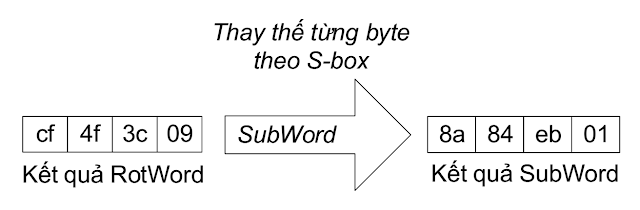

ví dụ word cf ở hàng c cột f là 8a
#### 3.AddRcon
- Sau khi có kết quả ở subword thì chúng ta chỉ cần xor kết quả đó với với w[j-4] và xor tiếp với Rcon(j/4) là xong

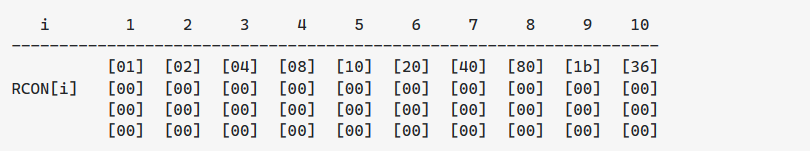

Ví dụ đã có kết quả như trên là subword = 8a84eb01 ta chỉ cần xor với w[j-4] và Rcon(1) = 01000000 là ra được w[4] (em không tính cụ thể cì không biết w[0])

### Thuật toán AES trong 1 vòng

Vòng lặp chính (từ 1 -> N-1) của AES thực hiện các hàm sau :
- SubBytes() – thay thế các byte dữ liệu (trạng thái).
- ShiftRows() – dịch vòng dữ liệu (trạng thái).
- MixColumns – trộn cột dữ liệu (trạng thái) vào.
- AddRoundKey – chèn khoá vòng.

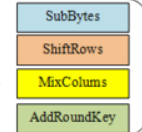

Trước khi đi vào 1 vòng chính thì ta phải thực hiện 1 bước khởi tạo đó là thêm khóa vòng(add round key).


Trong phép biến đổi cộng khoá – AddRoundKey 128 bits của State được thực hiện phép XOR bitwise với 128 bits khoá vòng (RoundKey).

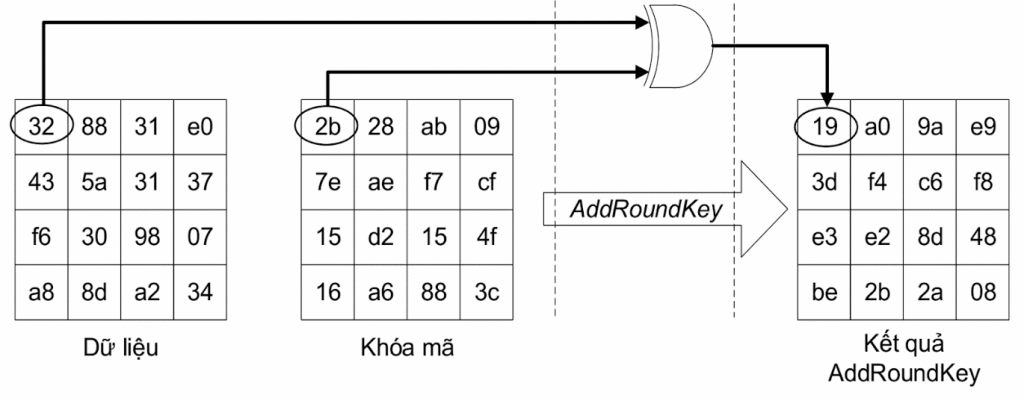

Sau đó chính ta sẽ bước vào vòng chính:


#### 1.SubBytes

- Chức năng SubBytes là thực hiện thay thế từng byte của ma trận trạng thái, ngõ ra của AddRoundKey, bằng một giá trị đã quy định trong chuẩn AES. Bảng quy định giá trị thay thế gọi là S-box.

S-box: 

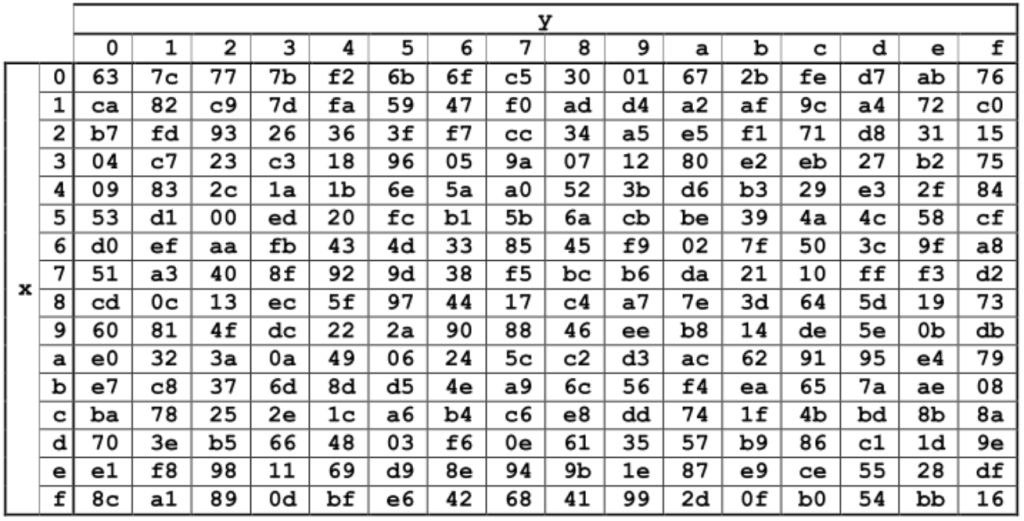

Ví dụ, byte cần thay thế là H08 thì dò ở hàng số 0 và cột số 8 trong bảng S-box sẽ được kết quả là 30.

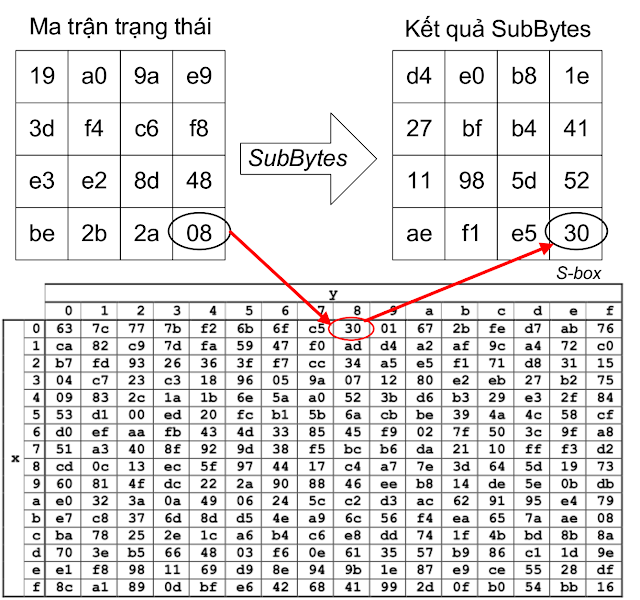

#### 2. ShiftRow
- Chức năng ShiftRows thực hiện quay trái từng hàng của ma trận trạng thái, ngõ ra của SubBytes, theo byte với hệ số quay tăng dần từ 0 đến 3. Hàng đầu tiên có hệ số quay là 0 thì các byte được giữ nguyên vị trí. Hàng thứ hai có hệ số quay là 1 thì các byte được quay một byte. Hàng thứ ba quay hai byte và hàng thứ tư quay ba byte.

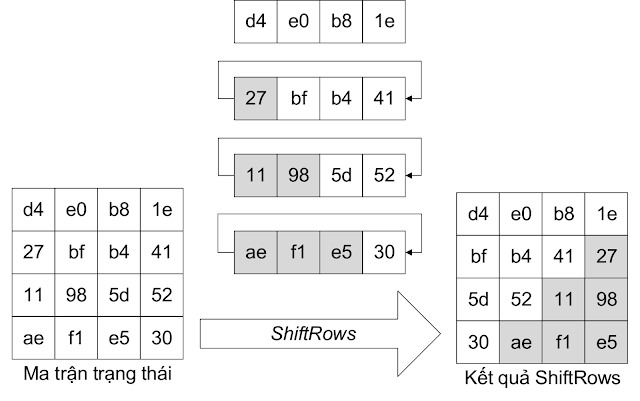

#### 3.MixColumn
- Sẽ lấy từng cột trong plaintext nhân với đa thức a(x) với : a(x) = 3x3 + x2 +x + 2

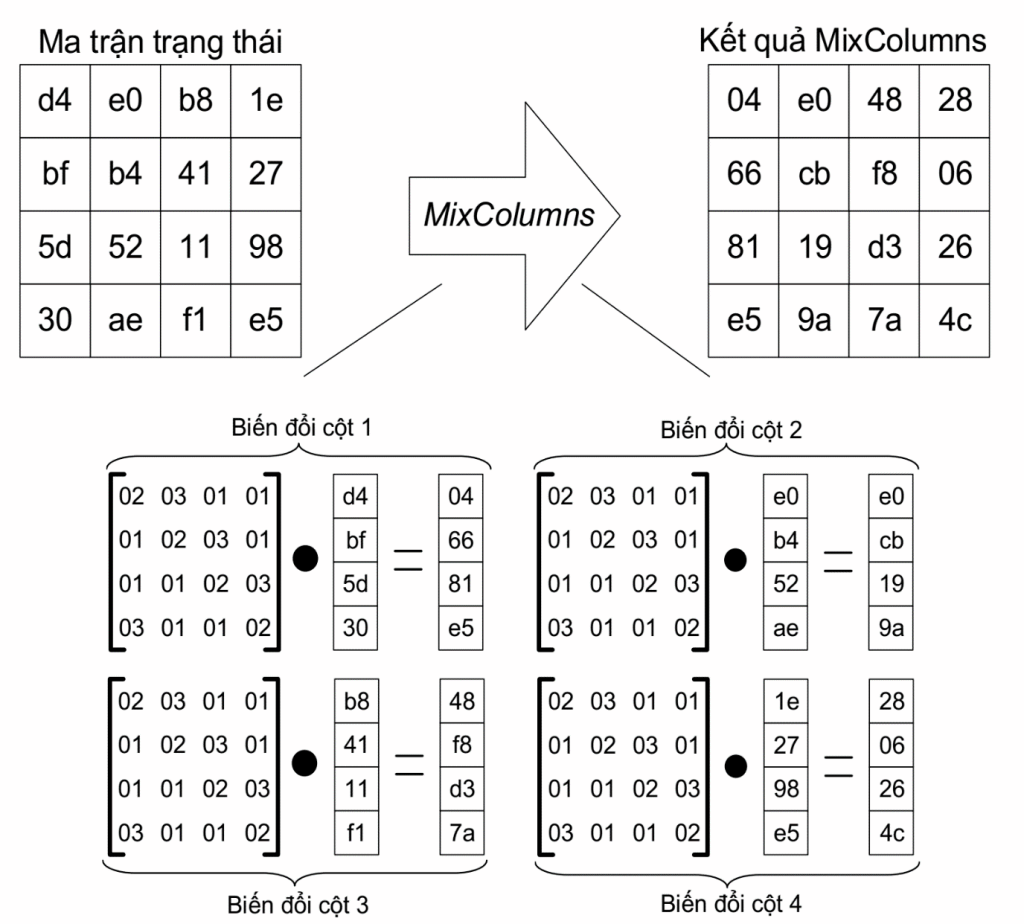

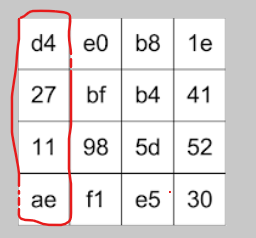

Mul2:
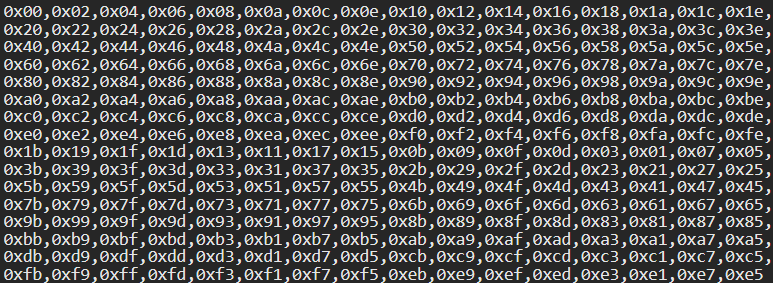

Mul3:
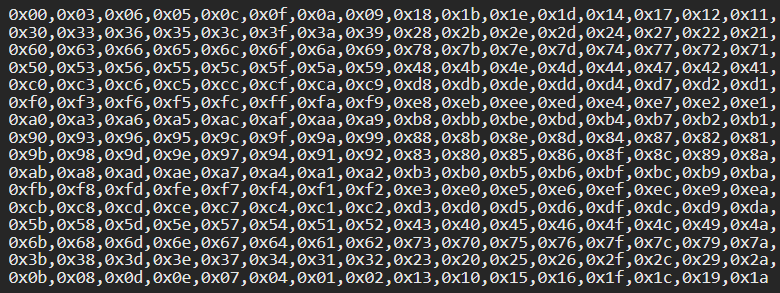

ví dụ như 0x57 * 0x02 thì ta chỉ cần tra hàng 5 cột 7 trong bảng mul 2 là xong = 0x8c

- Và cuối cùng Key Expansion tạo key và xor với giá trị trên để làm dữ liêu cho vòng tiếp theo cho đến hết vòng 9. Vòng 10 thì đặc biệt hơn là không có hàm Mixcolumn()
Sau khi thực hiện xong hết thì ta được bản mã hóa ciphertext.

In [1]:
def keyExpansion(key,numround,rci,s_box):
    round_const = rci[numround-1]
    gw3 = [key[3][1],key[3][2],key[3][3],key[3][0]]
    for i in range(4):
        u = hex(s_box[int(gw3[i][2],16)][int(gw3[i][3],16)])
        if(u == "0x0"):
            u = "0x00"
        elif(len(u.lstrip("0x"))<=1):
            u = "0x0"+u.lstrip("0x")
        gw3[i] = u
    a = 1
    b = 1
    if(gw3[0] == "0x00" or gw3[0] == "0x0"):
        a = 0
    else:
        a = int(gw3[0].lstrip("0x"),16)
    x = hex(int(a^int(round_const.lstrip("0x"),16)))
    if(x == "0x0"):
        x = "0x00"
    elif(len(x.lstrip("0x"))<=1):
        x = "0x0"+x.lstrip("0x")
    gw3[0] = x
    w4 = []
    for i in range(4):
        r = 1
        p = 1
        if(gw3[i] == "0x00" or gw3[i] == "0x0"):
            r = 0
        else:
            r = int(gw3[i].lstrip("0x"),16)
        if(key[0][i] == "0x00" or key[0][i] == "0x0"):
            p = 0
        else:
            p = int(key[0][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w4.append(y)
    w5 = []
    w6 = []
    w7 = []
    for i in range(4):
        r = 1
        p = 1
        if(w4[i] == "0x00" or w4[i] == "0x0"):
            r = 0
        else:
            r = int(w4[i].lstrip("0x"),16)
        if(key[1][i] == "0x00" or key[1][i] == "0x0"):
            p = 0
        else:
            p = int(key[1][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w5.append(y)
    for i in range(4):
        r = 1
        p = 1
        if(w5[i] == "0x00" or w5[i] == "0x0"):
            r = 0
        else:
            r = int(w5[i].lstrip("0x"),16)
        if(key[2][i] == "0x00" or key[2][i] == "0x0"):
            p = 0
        else:
            p = int(key[2][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w6.append(y)
    for i in range(4):
        r = 1
        p = 1
        if(w6[i] == "0x00" or w6[i] == "0x0"):
            r = 0
        else:
            r = int(w6[i].lstrip("0x"),16)
        if(key[3][i] == "0x00" or key[3][i] == "0x0"):
            p = 0
        else:
            p = int(key[3][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w7.append(y)
    return [w4,w5,w6,w7]

def addRoundKey(pt,rk):
    for i in range(4):
        for j in range(4):
            x = 0
            y = 0
            if(pt[j][i] != "0x00"):
                x = int(pt[j][i].lstrip("0x"),16)
            if(rk[j][i] != "0x00"):
                y = int(rk[j][i].lstrip("0x"),16)
            z = hex(x^y)
            if(z == "0x0"):
                z = "0x00"
            elif(len(z.lstrip("0x")) <= 1):
                z = "0x0"+z.lstrip("0x")
            pt[j][i] = z
    return pt

def substitute(pt,s_box):
    for i in range(4):
        for j in range(4):
            u = hex(s_box[int(pt[i][j][2],16)][int(pt[i][j][3],16)])
            if(u == "0x0"):
                u = "0x00"
            elif(len(u.lstrip("0x"))<=1):
                u = "0x0"+u.lstrip("0x")
            pt[i][j] = u
    return pt

def shiftRow(pt):
    pt[0][1],pt[1][1],pt[2][1],pt[3][1] = pt[1][1],pt[2][1],pt[3][1],pt[0][1]
    pt[0][2],pt[1][2],pt[2][2],pt[3][2] = pt[2][2],pt[3][2],pt[0][2],pt[1][2]
    pt[0][3],pt[1][3],pt[2][3],pt[3][3] = pt[3][3],pt[0][3],pt[1][3],pt[2][3]
    return pt

def mixMulCol(col,mul2,mul3):
    temp = []
    i = mul2[int(col[0][2],16)][int(col[0][3],16)]
    j = mul3[int(col[1][2],16)][int(col[1][3],16)]
    k = int(col[2],16)
    l = int(col[3],16)
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)

    i = int(col[0],16)
    j = mul2[int(col[1][2],16)][int(col[1][3],16)]
    k = mul3[int(col[2][2],16)][int(col[2][3],16)]
    l = int(col[3],16)
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)

    i = int(col[0],16)
    j = int(col[1],16)
    k = mul2[int(col[2][2],16)][int(col[2][3],16)]
    l = mul3[int(col[3][2],16)][int(col[3][3],16)]
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)

    i = mul3[int(col[0][2],16)][int(col[0][3],16)]
    j = int(col[1],16)
    k = int(col[2],16)
    l = mul2[int(col[3][2],16)][int(col[3][3],16)]
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)
    return temp
def mixCol(mul2,mul3,pt):
    res = []
    for i in range(4):
        temp = []
        temp.append(pt[i][0])
        temp.append(pt[i][1])
        temp.append(pt[i][2])
        temp.append(pt[i][3])
        res.append(mixMulCol(temp,mul2,mul3))
    return res
def printMatrix(m):
    for i in range(4):
        for j in range(4):
            y = m[j][i]
            if(y == "0x00"):
                y = "00"
            elif(len(y.lstrip("0x")) <= 1):
                y = "0"+y.lstrip("0x")
            else:
                y = y.lstrip("0x")
            print(y.upper(),end=" ")
        print(" ")
def printCipher(m):
    for i in range(4):
        for j in range(4):
            y = m[i][j]
            if(y == "0x00"):
                y = "00"
            elif(len(y.lstrip("0x")) <= 1):
                y = "0"+y.lstrip("0x")
            else:
                y = y.lstrip("0x")
            print(y.upper(),end=" ")
    print(" ")
plainText = input("Enter plain text in multiple of 16 bytes: ")
key = input("Enter key in multiple of 16 bytes: ")
s_box = [
    [0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
    [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0],
    [0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15],
    [0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75],
    [0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84],
    [0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF],
    [0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8],
    [0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2],
    [0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73],
    [0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB],
    [0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79],
    [0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08],
    [0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A],
    [0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E],
    [0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF],
    [0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16]
]
rci = ["0x01","0x02","0x04","0x08","0x10","0x20","0x40","0x80","0x1B","0x36"]
mul2 = [
    [0x00,0x02,0x04,0x06,0x08,0x0a,0x0c,0x0e,0x10,0x12,0x14,0x16,0x18,0x1a,0x1c,0x1e],
[0x20,0x22,0x24,0x26,0x28,0x2a,0x2c,0x2e,0x30,0x32,0x34,0x36,0x38,0x3a,0x3c,0x3e],
[0x40,0x42,0x44,0x46,0x48,0x4a,0x4c,0x4e,0x50,0x52,0x54,0x56,0x58,0x5a,0x5c,0x5e],
[0x60,0x62,0x64,0x66,0x68,0x6a,0x6c,0x6e,0x70,0x72,0x74,0x76,0x78,0x7a,0x7c,0x7e],
[0x80,0x82,0x84,0x86,0x88,0x8a,0x8c,0x8e,0x90,0x92,0x94,0x96,0x98,0x9a,0x9c,0x9e],
[0xa0,0xa2,0xa4,0xa6,0xa8,0xaa,0xac,0xae,0xb0,0xb2,0xb4,0xb6,0xb8,0xba,0xbc,0xbe],
[0xc0,0xc2,0xc4,0xc6,0xc8,0xca,0xcc,0xce,0xd0,0xd2,0xd4,0xd6,0xd8,0xda,0xdc,0xde],
[0xe0,0xe2,0xe4,0xe6,0xe8,0xea,0xec,0xee,0xf0,0xf2,0xf4,0xf6,0xf8,0xfa,0xfc,0xfe],
[0x1b,0x19,0x1f,0x1d,0x13,0x11,0x17,0x15,0x0b,0x09,0x0f,0x0d,0x03,0x01,0x07,0x05],
[0x3b,0x39,0x3f,0x3d,0x33,0x31,0x37,0x35,0x2b,0x29,0x2f,0x2d,0x23,0x21,0x27,0x25],
[0x5b,0x59,0x5f,0x5d,0x53,0x51,0x57,0x55,0x4b,0x49,0x4f,0x4d,0x43,0x41,0x47,0x45],
[0x7b,0x79,0x7f,0x7d,0x73,0x71,0x77,0x75,0x6b,0x69,0x6f,0x6d,0x63,0x61,0x67,0x65],
[0x9b,0x99,0x9f,0x9d,0x93,0x91,0x97,0x95,0x8b,0x89,0x8f,0x8d,0x83,0x81,0x87,0x85],
[0xbb,0xb9,0xbf,0xbd,0xb3,0xb1,0xb7,0xb5,0xab,0xa9,0xaf,0xad,0xa3,0xa1,0xa7,0xa5],
[0xdb,0xd9,0xdf,0xdd,0xd3,0xd1,0xd7,0xd5,0xcb,0xc9,0xcf,0xcd,0xc3,0xc1,0xc7,0xc5],
[0xfb,0xf9,0xff,0xfd,0xf3,0xf1,0xf7,0xf5,0xeb,0xe9,0xef,0xed,0xe3,0xe1,0xe7,0xe5]]

mul3 = [[0x00,0x03,0x06,0x05,0x0c,0x0f,0x0a,0x09,0x18,0x1b,0x1e,0x1d,0x14,0x17,0x12,0x11],
[0x30,0x33,0x36,0x35,0x3c,0x3f,0x3a,0x39,0x28,0x2b,0x2e,0x2d,0x24,0x27,0x22,0x21],
[0x60,0x63,0x66,0x65,0x6c,0x6f,0x6a,0x69,0x78,0x7b,0x7e,0x7d,0x74,0x77,0x72,0x71],
[0x50,0x53,0x56,0x55,0x5c,0x5f,0x5a,0x59,0x48,0x4b,0x4e,0x4d,0x44,0x47,0x42,0x41],
[0xc0,0xc3,0xc6,0xc5,0xcc,0xcf,0xca,0xc9,0xd8,0xdb,0xde,0xdd,0xd4,0xd7,0xd2,0xd1],
[0xf0,0xf3,0xf6,0xf5,0xfc,0xff,0xfa,0xf9,0xe8,0xeb,0xee,0xed,0xe4,0xe7,0xe2,0xe1],
[0xa0,0xa3,0xa6,0xa5,0xac,0xaf,0xaa,0xa9,0xb8,0xbb,0xbe,0xbd,0xb4,0xb7,0xb2,0xb1],
[0x90,0x93,0x96,0x95,0x9c,0x9f,0x9a,0x99,0x88,0x8b,0x8e,0x8d,0x84,0x87,0x82,0x81],
[0x9b,0x98,0x9d,0x9e,0x97,0x94,0x91,0x92,0x83,0x80,0x85,0x86,0x8f,0x8c,0x89,0x8a],
[0xab,0xa8,0xad,0xae,0xa7,0xa4,0xa1,0xa2,0xb3,0xb0,0xb5,0xb6,0xbf,0xbc,0xb9,0xba],
[0xfb,0xf8,0xfd,0xfe,0xf7,0xf4,0xf1,0xf2,0xe3,0xe0,0xe5,0xe6,0xef,0xec,0xe9,0xea],
[0xcb,0xc8,0xcd,0xce,0xc7,0xc4,0xc1,0xc2,0xd3,0xd0,0xd5,0xd6,0xdf,0xdc,0xd9,0xda],
[0x5b,0x58,0x5d,0x5e,0x57,0x54,0x51,0x52,0x43,0x40,0x45,0x46,0x4f,0x4c,0x49,0x4a],
[0x6b,0x68,0x6d,0x6e,0x67,0x64,0x61,0x62,0x73,0x70,0x75,0x76,0x7f,0x7c,0x79,0x7a],
[0x3b,0x38,0x3d,0x3e,0x37,0x34,0x31,0x32,0x23,0x20,0x25,0x26,0x2f,0x2c,0x29,0x2a],
[0x0b,0x08,0x0d,0x0e,0x07,0x04,0x01,0x02,0x13,0x10,0x15,0x16,0x1f,0x1c,0x19,0x1a]]

initialState = []
initialKey = []
finalState = []
total = 0
for i in range(4):
    temp = []
    temp1 = []
    temp2 = []
    for j in range(4):
        temp2.append(hex(ord(plainText[total])))
        temp.append(hex(ord(plainText[total])))
        temp1.append(hex(ord(key[total])))
        total+=1
    initialState.append(temp)
    initialKey.append(temp1)
    finalState.append(temp2)
print("--------Initial----------")
print("Initial Plain text Matrix")
printMatrix(initialState)
print("Initial Key matrix")
printMatrix(initialKey)
print("-------------------------")
print("---------Round 0---------")
print("After round 0 add key")
initialState = addRoundKey(initialState,initialKey)
printMatrix(initialState)
for i in range(1,11):
    print("--------Round "+str(i)+"---------")
    initialKey = keyExpansion(initialKey,i,rci,s_box)
    print("This round Key")
    printMatrix(initialKey)
    print("After Susbstitution")
    initialState = substitute(initialState,s_box)
    printMatrix(initialState)

    print("After shift rows")
    initialState = shiftRow(initialState)
    printMatrix(initialState)
    if(i!=10):
        print("After Mix column")
        initialState = mixCol(mul2,mul3,initialState)
        printMatrix(initialState)

    print("After add round key")
    initialState = addRoundKey(initialState,initialKey)
    printMatrix(initialState)
print("-----------Result----------")
print("Original Message")
printCipher(finalState)
print("The cipher text is")
printCipher(initialState)



        


IndexError: string index out of range